In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



In [14]:
df = pd.read_csv("../data/sample_data.csv")
df


,latitude,longitude,slope,rainfall,soil_type,landslide_history,risk_label
0,11.406,76.693,35,2200,2,1,1
1,11.410,76.700,28,1800,1,0,0
2,11.402,76.689,45,2500,3,1,1
3,11.398,76.680,15,1200,1,0,0
4,11.415,76.710,40,2300,2,1,1
5,11.420,76.720,20,1500,1,0,0
6,11.395,76.675,50,2700,3,1,1
7,11.430,76.730,18,1400,1,0,0


In [15]:
X = df.drop("risk_label", axis=1)
y = df["risk_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [17]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

feature_importance


rainfall             0.025711
slope                0.000385
soil_type            0.000067
longitude            0.000041
latitude             0.000028
landslide_history   -0.000333
dtype: float64

In [ ]:
new_location = pd.DataFrame([{
    "latitude": 11.412,
    "longitude": 76.705,
    "slope": 38,
    "rainfall": 2100,
    "soil_type": 2,
    "landslide_history": 1
}])

new_location


(np.float64(0.9995780747569146), np.int64(1))

In [26]:
risk_prob = model.predict_proba(new_location)[0][1]
risk_pred = model.predict(new_location)[0]

risk_prob, risk_pred


(np.float64(0.9995780747569146), np.int64(1))

In [22]:
if risk_pred == 1:
    risk_level = "HIGH RISK"
else:
    risk_level = "LOW RISK"

print("Predicted Risk Level:", risk_level)
print("Risk Probability:", round(risk_prob, 2))


Predicted Risk Level: HIGH RISK
Risk Probability: 1.0


In [28]:
explanations = []

if new_location["slope"].iloc[0] > 30:
    explanations.append("Steep slope increases landslide risk.")

if new_location["rainfall"].iloc[0] > 2000:
    explanations.append("High rainfall contributes to soil instability.")

if new_location["landslide_history"].iloc[0] == 1:
    explanations.append("Past landslide activity detected in this area.")

if new_location["soil_type"].iloc[0] == 3:
    explanations.append("Fragile soil type increases construction risk.")

print("Explanation:")
for exp in explanations:
    print("-", exp)


Explanation:
- Steep slope increases landslide risk.
- High rainfall contributes to soil instability.
- Past landslide activity detected in this area.


<Axes: title={'center': 'Feature Influence on Risk Prediction'}>

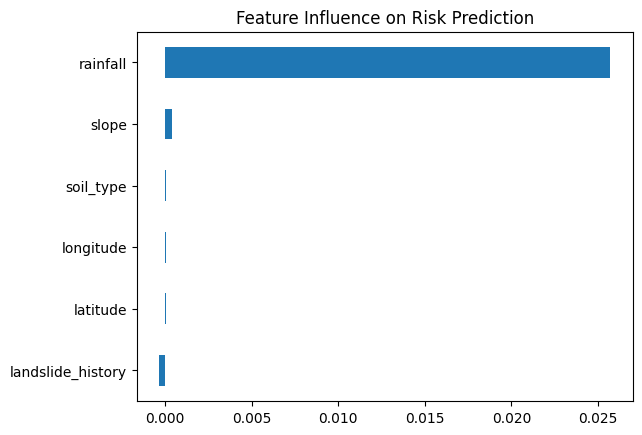

In [29]:
feature_importance.sort_values().plot(kind="barh", title="Feature Influence on Risk Prediction")
